This notebook uses the visualisation functions of PyABC to plot the results of the parameter fitting to the Notch1 lineage tracing data.   

Before running this notebook, the ABC fitting should be run using the abc_fitting.py script (see README), 
which will produce the files `wt_pyabc.db`, `het_pyabc.db`, `hom_pyabc.db`, `het_wt_pyabc.db` and `hom_wt_pyabc.db`

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
import os
from pyabc.visualization import plot_kde_2d, plot_kde_matrix, plot_kde_1d, plot_credible_intervals
from pyabc import History

In [3]:
from pyabc.visualization.credible import compute_credible_interval, compute_kde_max, compute_quantile

In [4]:
from collections import OrderedDict

In [5]:
def get_inferred_fit(df, w):
    median_fitness = compute_quantile(np.array(df['fitness']), w, alpha=0.5)
    median_induction = compute_quantile(np.array(df['induction']), w, alpha=0.5)
    print('median fitness', median_fitness)
    print('median induction', median_induction)
    print('95CI fitness', compute_credible_interval(np.array(df['fitness']), w))
    print('95CI induction', compute_credible_interval(np.array(df['induction']), w))
    return {'fitness': median_fitness, 'induction': median_induction}

In [6]:
limits = {"fitness": [0, 50], "induction": [0, 0.1]}  # These were the ranges of the prior parameter distributions

# Het

In [7]:
db_path = "sqlite:///" + "het_pyabc.db"
hist_het = History(db_path)
df_het, w_het = hist_het.get_distribution(m=0)

In [8]:
HET_PARAMS = get_inferred_fit(df_het, w_het);

median fitness 2.2798065488953827
median induction 0.02274515298934408
95CI fitness (2.020980478606173, 2.613100253787201)
95CI induction (0.017229010816853157, 0.028727685574963524)


# Hom

In [9]:
db_path = "sqlite:///" + "hom_pyabc.db"
hist_hom = History(db_path)
df_hom, w_hom = hist_hom.get_distribution(m=0)

In [10]:
HOM_PARAMS = get_inferred_fit(df_hom, w_hom)

median fitness 7.047314812900756
median induction 0.004549076782422122
95CI fitness (6.188934222147853, 8.616281278944859)
95CI induction (0.000132129100465068, 0.00843781923578664)


# Hom CTL

In [11]:
db_path = "sqlite:///" + "hom_ctl_pyabc.db"
hist_hom_ctl = History(db_path)
df_hom_ctl, w_hom_ctl = hist_hom_ctl.get_distribution(m=0)

In [12]:
get_inferred_fit(df_hom_ctl, w_hom_ctl);

median fitness 1.0302071592122177
median induction 0.0519616963914189
95CI fitness (0.9588132360712948, 1.1242175608983702)
95CI induction (0.002760051329693719, 0.09703246284647551)


# Het CTL

In [13]:
db_path = "sqlite:///" + "het_ctl_pyabc.db"
hist_het_ctl = History(db_path)
df_het_ctl, w_het_ctl = hist_het_ctl.get_distribution(m=0)

In [14]:
get_inferred_fit(df_het_ctl, w_het_ctl);

median fitness 0.9557602570802904
median induction 0.05072329352166699
95CI fitness (0.9252462787104764, 0.9945615082393384)
95CI induction (0.003530570512338681, 0.09802850248573641)


# WT

In [15]:
db_path = "sqlite:///" + "wt_pyabc.db"
hist_wt = History(db_path)
df_wt, w_wt = hist_wt.get_distribution(m=0)

In [16]:
WT_PARAMS = get_inferred_fit(df_wt, w_wt)

median fitness 0.9898450258100082
median induction 0.053996727633463
95CI fitness (0.9576270223344407, 1.0252912041178648)
95CI induction (0.001658416740796023, 0.09896343959995683)


# Plots

In [17]:
all_results = OrderedDict([
    ('WT', (df_wt, w_wt)),
    ('iHET_ctl', (df_het_ctl, w_het_ctl)),
    ('iHOM_ctl', (df_hom_ctl, w_hom_ctl)),
    ('iHET', (df_het, w_het)),
    ('iHOM', (df_hom, w_hom))]
)

## Fitness credible intervals

In [18]:
ticks = []
bottoms = []
tops = []
medians = []
for k, (df, w) in all_results.items():
    ci_l, ci_u = compute_credible_interval(np.array(df['fitness']), w)
    median = compute_quantile(np.array(df['fitness']), w, alpha=0.5)
    ticks.append(k)
    bottoms.append(ci_l)
    tops.append(ci_u)
    medians.append(median)

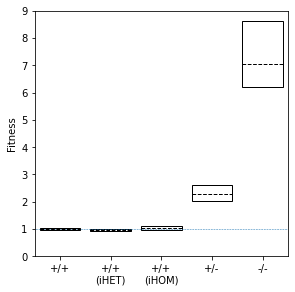

In [19]:
plt.figure(figsize=(4.2, 4))
plt.bar(range(5), np.array(tops)-np.array(bottoms), bottom=bottoms, facecolor='w', edgecolor='k', linestyle='-')
for i, m in enumerate(medians):
    plt.plot([i-0.4, i+0.4], [m, m], c='k', linestyle='--', linewidth=1)
plt.ylim(bottom=0)
plt.yticks(range(10))
plt.hlines(1, -1, 10, linestyles='--', linewidth=0.5)
plt.xlim([-0.5, 4.5])
plt.ylim(bottom=0)
plt.ylabel('Fitness')
plt.tight_layout()
plt.xticks(range(5), ['+/+', '+/+\n(iHET)', '+/+\n(iHOM)', '+/-', '-/-']);

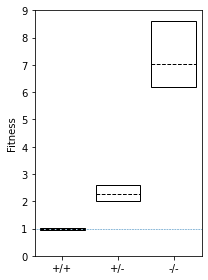

In [20]:
# Version with just WT, iHET and iHOM
plt.figure(figsize=(3, 4))
tops2 = np.array(tops)[[0, 3, 4]]
bottoms2 = np.array(bottoms)[[0, 3, 4]]
medians2 = np.array(medians)[[0, 3, 4]]

plt.bar(range(3), np.array(tops2)-np.array(bottoms2), bottom=bottoms2, facecolor='w', edgecolor='k', linestyle='-')
for i, m in enumerate(medians2):
    plt.plot([i-0.4, i+0.4], [m, m], c='k', linestyle='--', linewidth=1)
plt.ylim(bottom=0)
plt.yticks(range(10))
plt.hlines(1, -1, 10, linestyles='--', linewidth=0.5)
plt.xlim([-0.5, 2.5])
plt.ylim(bottom=0)
plt.ylabel('Fitness')
plt.xticks(range(3), ['+/+', '+/-', '-/-'])
plt.tight_layout()
plt.savefig("ABC_inferred_fitness.pdf");

# All results on the fitness-induction plane

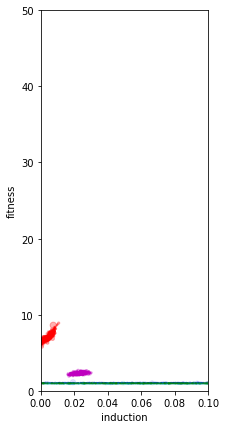

In [21]:
plt.figure(figsize=(3, 7))
plt.scatter(df_het['induction'], df_het['fitness'], s=w_het*1000, alpha=0.3, c='m')
plt.scatter(df_hom['induction'], df_hom['fitness'], s=w_hom*1000, alpha=0.3, c='r')
plt.scatter(df_hom_ctl['induction'], df_hom_ctl['fitness'], s=w_hom_ctl*1000, alpha=0.1, c='b')
plt.scatter(df_het_ctl['induction'], df_het_ctl['fitness'], s=w_het_ctl*1000, alpha=0.1, c='c')
plt.scatter(df_wt['induction'], df_wt['fitness'], s=w_wt*1000, alpha=0.1, c='g')
plt.ylim([0, 50])
plt.xlim([0, 0.1])
plt.xlabel('induction') 
plt.ylabel('fitness');

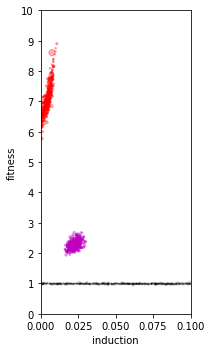

In [22]:
# Zoom in and only show the +/+, +/- and -/- cases
plt.figure(figsize=(3, 5))
plt.scatter(df_het['induction'], df_het['fitness'], s=w_het*1000, alpha=0.3, c='m')
plt.scatter(df_hom['induction'], df_hom['fitness'], s=w_hom*1000, alpha=0.3, c='r')
plt.scatter(df_wt['induction'], df_wt['fitness'], s=w_wt*1000, alpha=0.1, c='k')
plt.ylim([0, 10])
plt.xlim([0, 0.1])
plt.yticks(range(11))
plt.xlabel('induction') 
plt.ylabel('fitness')
plt.tight_layout()
plt.savefig("ABC_inferred_fitness_induction.pdf");

# Best fitting simulations

Run 100 simulations with the median of the inferred fitness and induction values for the WT, het and hom data.   
Use 70 clones from each simulation to roughly match the experimental number of clones.

In [23]:
from abc_fitting import *

In [24]:
NUM_CLONES = 70

In [25]:
def get_sim_means(parameters, num, data):
    # Take many samples of N clones. 
    # Get mean clone size in each simulation.
    # Get mean of the means and the 95% interval. 
    
    res = [[] for t in data]
    for i in range(num):
        print(i, end=' ')
        np.random.seed(i)
        clone_sizes = run_sim(parameters=parameters, target_data=data, return_clone_sizes=True)
        for j, (t, clones) in enumerate(clone_sizes.items()):
            res[j].append(clones.mean())
        
    
    # Start with single cell clones at time zero
    intervals_high = [1]
    intervals_low = [1]
    means = [1]
    for r in res:
        intervals_high.append(np.quantile(r, 0.975))
        intervals_low.append(np.quantile(r, 0.025))
        means.append(np.mean(r))
    
    return means, intervals_high, intervals_low

In [26]:
from scipy.stats import sem

def plot_data(results, colour=None, label=None, err_stat=sem, elinewidth=2, capsize=4, markersize=3):
    x = results.keys()
    y = [results[k].mean() for k in results]
    yerr = [err_stat(results[k]) for k in results]
    plt.errorbar(x, y, yerr=yerr, label=label, c=colour, 
                 elinewidth=elinewidth, 
                 capsize=capsize, capthick=elinewidth,
                 markersize=markersize,
                 fmt='o')

In [27]:
# Load the data
HET = load_data('het', DATA_FILE)
HOM = load_data('hom', DATA_FILE)
WT = load_data('wt', DATA_FILE)

In [28]:
# Run the simulations

In [29]:
het_means, het_interval_high, het_interval_low = get_sim_means(HET_PARAMS, 100, HET)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [30]:
wt_means, wt_interval_high, wt_interval_low = get_sim_means(WT_PARAMS, 100, WT)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [31]:
hom_means, hom_interval_high, hom_interval_low = get_sim_means(HOM_PARAMS, 100, HOM)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

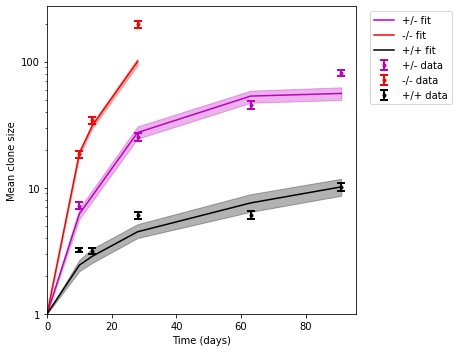

In [32]:
plt.figure(figsize=(6.5, 5))

data = HET
colour_sim = 'm'
colour_data = 'm'
times = [0] + [t for t in data]
plt.plot(times, het_means, label='+/- fit', c=colour_sim)
plt.fill_between(times, het_interval_high, het_interval_low, alpha=0.3, color=colour_sim)
plot_data(data, label='+/- data', colour=colour_data, markersize=3)


data = HOM
colour_sim = 'r'
colour_data = 'r'
times = [0] + [t for t in data]
plt.plot(times, hom_means, label='-/- fit', c=colour_sim)
plt.fill_between(times, hom_interval_high, hom_interval_low, alpha=0.3, color=colour_sim)
plot_data(data, label='-/- data', colour=colour_data)

data = WT
colour_sim = 'k'
colour_data = 'k'
times = [0] + [t for t in data]
plt.plot(times, wt_means, label='+/+ fit', c=colour_sim)
plt.fill_between(times, wt_interval_high, wt_interval_low, alpha=0.3, color=colour_sim)
plot_data(data, label='+/+ data', colour=colour_data)

plt.xlim(left=0)
plt.legend(bbox_to_anchor=(1.03, 1))
plt.yscale('log')
plt.ylabel('Mean clone size')
plt.xlabel('Time (days)')
plt.ylim(bottom=1)
plt.yticks([1, 10, 100], [1, 10, 100]);
plt.tight_layout()
plt.savefig('Simulations_mean_clone_size.pdf');

# Simulation videos

Generate some videos of WT, het, hom and YFP clones similar to the lineage tracing experiments.   

In [33]:
# Define the colours for the clones. 
from collections import namedtuple
from clone_competition_simulation.colourscales import ColourScale

wt_colour = lambda x: (127/255, 26/255, 90/255, 1) 
het_colour = lambda x: (62/255, 14/255, 53/255, 1)
hom_colour = lambda x: (70/255, 30/255, 110/255, 1)
yfp_colour = lambda x: (40/255, 185/255, 15/255, 1) 


TCS = namedtuple('cs', ['label'])  # All mutations at start, so can use labels for everything
# Label = 0 WT
# Label = 1 WT + YFP
# Label = 2 Het
# Label = 3 Het + YFP
CS_HET = ColourScale(
    name='cs',
    all_clones_noisy=False,
    colourmaps={TCS(label=0): wt_colour,
                TCS(label=1): yfp_colour,
                TCS(label=2): het_colour,
                TCS(label=3): yfp_colour
         }
)

CS_HOM = ColourScale(
    name='cs',
    all_clones_noisy=False,
    colourmaps={TCS(label=0): wt_colour,
                TCS(label=1): yfp_colour,
                TCS(label=2): hom_colour,
                TCS(label=3): yfp_colour
         }
)

In [34]:
from clone_competition_simulation.parameters import Parameters

# The videos have to be small, so only run for small grids
GRID_SHAPE = [300, 150]
MAX_TIME = 30  # Run to the last hom time point
DIVISION_RATE = 0.27
CELLS = GRID_SHAPE[0]*GRID_SHAPE[1]

def get_grid(fitness, induction_yfp, induction_mutant):
    # Randomly assign cells in a grid to be YFP or Notch1 mutant.
    # Some of the cells will be both YFP and Notch1 mutant clones. 
    
    
    initial_grid = np.zeros(GRID_SHAPE, dtype=int)
    total_yfp = int(induction_yfp*CELLS)
    yfp_locs = np.random.choice(GRID_SHAPE[0]*GRID_SHAPE[1], total_yfp, replace=False)
    yfp_locs = [(m // GRID_SHAPE[1], m % GRID_SHAPE[1]) for m in yfp_locs]  # Convert the random draws into array indices
    
    total_mutants = int(induction_mutant*CELLS)
    mutant_locs = np.random.choice(GRID_SHAPE[0]*GRID_SHAPE[1], total_mutants, replace=False)
    mutant_locs = [(m // GRID_SHAPE[1], m % GRID_SHAPE[1]) for m in mutant_locs]  # Convert the random draws into array indices
    
    yfp_mutant_cells = set(yfp_locs).intersection(mutant_locs)
    num_yfp_mutant = len(yfp_mutant_cells)

    count = 0
    for m in yfp_locs:
        if m not in yfp_mutant_cells:
            count += 1
            initial_grid[m] = count
    
    for m in mutant_locs:
        if m not in yfp_mutant_cells:
            count += 1
            initial_grid[m] = count
    
    for m in yfp_mutant_cells:
        count += 1
        initial_grid[m] = count

    fitness_array = [1] + [1]*(total_yfp-num_yfp_mutant) + [fitness]*total_mutants
    label_array = [0] + [1]*(total_yfp-num_yfp_mutant) + [2]*(total_mutants-num_yfp_mutant) + [3]*num_yfp_mutant
    return initial_grid, fitness_array, label_array


def run_sim(parameters, colourscale):
    fitness, induction_yfp, induction_mutant = parameters['fitness'], parameters['induction_yfp'], parameters['induction_mutant']

    initial_grid, fitness_array, label_array = get_grid(fitness, induction_yfp, induction_mutant)
    if len(fitness_array) == 1: # Induction rate too low. No mutants on grid.
        return None
    p = Parameters(algorithm='WF2D', initial_grid=initial_grid, times=np.arange(MAX_TIME), 
                   fitness_array=fitness_array, colourscales=colourscale,
                   label_array=label_array,
                   print_warnings=False, division_rate=DIVISION_RATE, 
                  cell_in_own_neighbourhood=True)
    s = p.get_simulator()
    s.run_sim()
    return s

In [35]:
genotype_label_loc = (0, 40)
genotype_label_kwargs = {"fontsize":80, "color": "white"}

In [36]:
# For WT, we just assume a fitness of 1, and so only need to include YFP clones
s = run_sim({'fitness': None, 'induction_yfp': 0.02, 'induction_mutant': 0} , CS_HET)
s.animate('wt_video.mp4', figxsize=10, fps=2, dpi=300, bitrate=2000, fixed_label_text="+/+", 
          fixed_label_loc=genotype_label_loc, fixed_label_kwargs=genotype_label_kwargs)

/Users/mh28/PycharmProjects/clone-competition-simulation/clone_competition_simulation/animator.py:139: MatplotlibDeprecationWarning: 
The 'offset_position' parameter of __init__() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. If any parameter follows 'offset_position', they should be passed as keyword, not positionally.
  offset_position="data"
/Users/mh28/PycharmProjects/clone-competition-simulation/clone_competition_simulation/animator.py:139: MatplotlibDeprecationWarning: 
The set_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  offset_position="data"
/Users/mh28/PycharmProjects/clone-competition-simulation/clone_competition_simulation/animator.py:201: MatplotlibDeprecationWarning: Support for offset_position='data' is deprecated since 3.3 and will be removed two minor releases later.
  frames=len(self.comp.grid_results))
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animati

In [37]:
het_parameters={'fitness': HET_PARAMS['fitness'], 'induction_yfp': 0.02, 'induction_mutant': HET_PARAMS['induction']}
s = run_sim(het_parameters, CS_HET)
s.animate('het_video.mp4', figxsize=10, fps=2, dpi=300, bitrate=2000, fixed_label_text="+/-", 
          fixed_label_loc=genotype_label_loc, fixed_label_kwargs=genotype_label_kwargs)

/Users/mh28/PycharmProjects/clone-competition-simulation/clone_competition_simulation/animator.py:139: MatplotlibDeprecationWarning: 
The 'offset_position' parameter of __init__() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. If any parameter follows 'offset_position', they should be passed as keyword, not positionally.
  offset_position="data"
/Users/mh28/PycharmProjects/clone-competition-simulation/clone_competition_simulation/animator.py:139: MatplotlibDeprecationWarning: 
The set_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  offset_position="data"
/Users/mh28/PycharmProjects/clone-competition-simulation/clone_competition_simulation/animator.py:201: MatplotlibDeprecationWarning: Support for offset_position='data' is deprecated since 3.3 and will be removed two minor releases later.
  frames=len(self.comp.grid_results))
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animati

In [38]:
# For the het and hom simulations, we use the median results from the ABC fitting.
hom_parameters = {'fitness': HOM_PARAMS['fitness'], 'induction_yfp': 0.04, 'induction_mutant': HOM_PARAMS['induction']} 
s = run_sim(hom_parameters, CS_HOM)
s.animate('hom_video.mp4', figxsize=10, fps=2, dpi=300, bitrate=2000, fixed_label_text=" -/-", 
          fixed_label_loc=genotype_label_loc, fixed_label_kwargs=genotype_label_kwargs, 
         show_time_label=True, time_label_kwargs={"fontsize":40, "color": "white"}, 
          time_label_loc=(200, 10), time_label_units='days')

/Users/mh28/PycharmProjects/clone-competition-simulation/clone_competition_simulation/animator.py:139: MatplotlibDeprecationWarning: 
The 'offset_position' parameter of __init__() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. If any parameter follows 'offset_position', they should be passed as keyword, not positionally.
  offset_position="data"
/Users/mh28/PycharmProjects/clone-competition-simulation/clone_competition_simulation/animator.py:139: MatplotlibDeprecationWarning: 
The set_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  offset_position="data"
/Users/mh28/PycharmProjects/clone-competition-simulation/clone_competition_simulation/animator.py:201: MatplotlibDeprecationWarning: Support for offset_position='data' is deprecated since 3.3 and will be removed two minor releases later.
  frames=len(self.comp.grid_results))
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animati